In [1]:
import os
import numpy as np
import keras
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras import regularizers
from tensorflow.keras.models import Sequential, Model

Using TensorFlow backend.


In [2]:
from keras import models
from keras import layers
from keras import optimizers

In [3]:
import tensorflow as tf 
model = tf.keras.models.load_model('resnet_cropdisease.h5')

Instructions for updating:
`normal` is a deprecated alias for `truncated_normal`
Instructions for updating:
If using Keras pass *_constraint arguments to layers.


In [8]:
from keras.preprocessing.image import ImageDataGenerator

In [9]:
train_datagen = ImageDataGenerator(  
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    fill_mode='nearest',
)
# test_datagen = ImageDataGenerator(preprocessing_function=preprocess_input)

In [10]:
train_generator = train_datagen.flow_from_directory(
    '/home/asus/Desktop/Dataset_splits/train/', 
        target_size=(224, 224),
        batch_size=128,
        class_mode='categorical',
)
# test_generator = test_datagen.flow_from_directory(test_dir, target_size=(IM_WIDTH, IM_HEIGHT), batch_size=batch_size)

Found 22110 images belonging to 33 classes.


In [11]:
class_dict = train_generator.class_indices

li = list(class_dict.keys())
print(li)

['Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot', 'Corn_(maize)___Common_rust_', 'Corn_(maize)___healthy', 'GD_Alternia', 'GD_Deficiency', 'GD_Healthy', 'GD_Leaf_Blight', 'GD_Rust', 'GD_Spidermites', 'GD_Toxicity', 'GD_Webbloch', 'Paddy_Bacterial_leaf_blight', 'Paddy_Brown_spot', 'Pepper__bell___Bacterial_spot', 'Pepper__bell___healthy', 'Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy', 'Tomato_Bacterial_spot', 'Tomato_Early_blight', 'Tomato_Late_blight', 'Tomato_Leaf_Mold', 'Tomato_Septoria_leaf_spot', 'Tomato_Spider_mites_Two_spotted_spider_mite', 'Tomato__Target_Spot', 'Tomato__Tomato_YellowLeaf__Curl_Virus', 'Tomato__Tomato_mosaic_virus', 'Tomato_healthy', 'pomo_Alternaria_Alternata', 'pomo_Anthracnose', 'pomo_Bacterial_Blight', 'pomo_Cercospora_LeafSpot', 'pomo_Healthy_Leaves']


Following is our prediction:


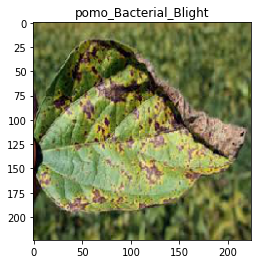

In [15]:
# predicting an image
from keras.preprocessing import image
import numpy as np
image_path = "/home/asus/Desktop/Dataset_splits/train/pomo_Bacterial_Blight/5.jpg"
new_img = image.load_img(image_path, target_size=(224, 224))
img = image.img_to_array(new_img)
img = np.expand_dims(img, axis=0)
# img = img/255

print("Following is our prediction:")
prediction = model.predict(img)
# # # decode the results into a list of tuples (class, description, probability)
# # # (one such list for each sample in the batch)
d = prediction.flatten()
j = d.max()
for index,item in enumerate(d):
    if item == j:
        class_name = li[index]

# # Another way
# img_class = model.predict_classes(img)
# img_prob = model.predict_proba(img)
# print(img_class ,img_prob )


#ploting image with predicted class name        
plt.figure(figsize = (4,4))
plt.imshow(new_img)
plt.axis('on')
# # out = loaded_model.predict(img) 
# # print(out)
# # print(np.argmax(out))
# # plt.title(class_name[np.argmax(out)])
plt.title(class_name)
plt.show()